In [1]:
import requests
from bs4 import BeautifulSoup as bs
import re
import pandas as pd

In [2]:
# importing a url
url = 'https://www.worldometers.info/coronavirus/'

r = requests.get(url)

soup = bs(r.content,'html.parser')

In [4]:
colum = []
table = soup.select('table#main_table_countries_today th')
for i in table:
    colum.append(i.get_text())
    

In [5]:
row=[]
rows = soup.select('table#main_table_countries_today tr')
for i in rows:
    row.append(i.get_text())

In [6]:
new_row = []
for x in row:
    y = x.replace("\n", "$").replace('+','')
    new_row.append(y)
    

In [47]:
new_row[0:5]

['$#$Country,Other$TotalCases$NewCases$TotalDeaths$NewDeaths$TotalRecovered$NewRecovered$ActiveCases$Serious,Critical$Tot\xa0Cases/1M pop$Deaths/1M pop$TotalTests$Tests/$1M pop$$Population$Continent$1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl$',
 '$$$North America$$12,206,446$105,813$364,503$1,026$7,925,241$45,167$3,916,702$22,185$$$$$$North America$$$$$',
 '$$$Asia$$14,425,481$94,779$255,352$1,496$12,881,069$92,868$1,289,060$23,041$$$$$$Asia$$$$$',
 '$$$South America$$9,997,572$29,382$302,482$637$8,934,380$27,059$760,710$17,709$$$$$$South America$$$$$',
 '$$$Europe$$12,145,761$217,454$292,872$2,326$4,401,570$49,755$7,451,319$27,038$$$$$$Europe$$$$$']

In [46]:
main_row = []
bad_rows = []
for i in new_row[1:]:
    j = i.split("$")
    j.pop(0)
    j.pop()
    j.pop()
    if len(j)==16:
        main_row.append(j)
    else:
        bad_rows.append(j)
print(main_row[0:5])

[['1', 'USA', '10,278,766', '93,346', '243,731 ', '474', '6,480,552', '36,467', '3,554,483', '18,440', '30,989', '735', '157,450,167', '474,690', '331,690,410 ', 'North America'], ['2', 'India', '8,553,864', '46,661', '126,653 ', '491', '7,915,660', '48,369', '511,551', '8,944', '6,177', '91', '117,736,791', '85,021', '1,384,789,745 ', 'Asia'], ['3', 'Brazil', '5,664,115', '10,554', '162,397 ', '111', '5,064,344', '', '437,374', '8,318', '26,580', '762', '21,900,000', '102,772', '213,094,038 ', 'South America'], ['4', 'France', '1,787,324', '38,619', '40,439 ', '270', '128,614', '676', '1,618,271', '4,539', '27,361', '619', '17,891,276', '273,881', '65,324,901 ', 'Europe'], ['5', 'Russia', '1,774,334', '20,498', '30,537 ', '286', '1,324,419', '11,492', '419,378', '2,300', '12,157', '209', '64,600,000', '442,597', '145,956,770 ', 'Europe']]


In [9]:
bad_rows

[['',
  '',
  'North America',
  '',
  '12,206,446',
  '105,813',
  '364,503',
  '1,026',
  '7,925,241',
  '45,167',
  '3,916,702',
  '22,185',
  '',
  '',
  '',
  '',
  '',
  'North America',
  '',
  '',
  ''],
 ['',
  '',
  'Asia',
  '',
  '14,425,481',
  '94,779',
  '255,352',
  '1,496',
  '12,881,069',
  '92,868',
  '1,289,060',
  '23,041',
  '',
  '',
  '',
  '',
  '',
  'Asia',
  '',
  '',
  ''],
 ['',
  '',
  'South America',
  '',
  '9,997,572',
  '29,382',
  '302,482',
  '637',
  '8,934,380',
  '27,059',
  '760,710',
  '17,709',
  '',
  '',
  '',
  '',
  '',
  'South America',
  '',
  '',
  ''],
 ['',
  '',
  'Europe',
  '',
  '12,145,761',
  '217,454',
  '292,872',
  '2,326',
  '4,401,570',
  '49,755',
  '7,451,319',
  '27,038',
  '',
  '',
  '',
  '',
  '',
  'Europe',
  '',
  '',
  ''],
 ['',
  '',
  'Africa',
  '',
  '1,893,371',
  '12,242',
  '45,425',
  '229',
  '1,594,976',
  '9,554',
  '252,970',
  '2,454',
  '',
  '',
  '',
  '',
  '',
  'Africa',
  '',
  '',
  ''],
 

In [10]:
new_colum =[]
for i in colum:
    if '\n' in i:
        j = i.replace('\n',"")
        new_colum.append(j)
    else:
        new_colum.append(i)
new_colum = new_colum[:-3]

In [11]:
new_colum

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/1M pop',
 'Population',
 'Continent']

In [45]:
main_row[0:5]

[['1',
  'USA',
  '10,278,766',
  '93,346',
  '243,731 ',
  '474',
  '6,480,552',
  '36,467',
  '3,554,483',
  '18,440',
  '30,989',
  '735',
  '157,450,167',
  '474,690',
  '331,690,410 ',
  'North America'],
 ['2',
  'India',
  '8,553,864',
  '46,661',
  '126,653 ',
  '491',
  '7,915,660',
  '48,369',
  '511,551',
  '8,944',
  '6,177',
  '91',
  '117,736,791',
  '85,021',
  '1,384,789,745 ',
  'Asia'],
 ['3',
  'Brazil',
  '5,664,115',
  '10,554',
  '162,397 ',
  '111',
  '5,064,344',
  '',
  '437,374',
  '8,318',
  '26,580',
  '762',
  '21,900,000',
  '102,772',
  '213,094,038 ',
  'South America'],
 ['4',
  'France',
  '1,787,324',
  '38,619',
  '40,439 ',
  '270',
  '128,614',
  '676',
  '1,618,271',
  '4,539',
  '27,361',
  '619',
  '17,891,276',
  '273,881',
  '65,324,901 ',
  'Europe'],
 ['5',
  'Russia',
  '1,774,334',
  '20,498',
  '30,537 ',
  '286',
  '1,324,419',
  '11,492',
  '419,378',
  '2,300',
  '12,157',
  '209',
  '64,600,000',
  '442,597',
  '145,956,770 ',
  'Euro

In [13]:
df = pd.DataFrame(data=main_row,columns=new_colum)

In [43]:
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
0,1,USA,"10,278,766","93,346","243,731",474,"6,480,552","36,467","3,554,483","18,440","30,989",735,"157,450,167","474,690","331,690,410",North America
1,2,India,"8,553,864","46,661","126,653",491,"7,915,660","48,369","511,551","8,944","6,177",91,"117,736,791","85,021","1,384,789,745",Asia
2,3,Brazil,"5,664,115","10,554","162,397",111,"5,064,344",,"437,374","8,318","26,580",762,"21,900,000","102,772","213,094,038",South America
3,4,France,"1,787,324","38,619","40,439",270,"128,614",676,"1,618,271","4,539","27,361",619,"17,891,276","273,881","65,324,901",Europe
4,5,Russia,"1,774,334","20,498","30,537",286,"1,324,419","11,492","419,378","2,300","12,157",209,"64,600,000","442,597","145,956,770",Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,214,MS Zaandam,9,,2,,,,7,,,,,,,
214,215,Anguilla,3,,,,3,,0,,199,,"1,820","120,930","15,050",North America
215,216,Marshall Islands,1,,,,,,1,,17,,,,"59,331",Australia/Oceania
216,217,Wallis and Futuna,1,,,,1,,0,,90,,"1,149","102,892","11,167",Australia/Oceania


### Further code for creating visualization for GUI

In [14]:
df.columns

Index(['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths',
       'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests',
       'Tests/1M pop', 'Population', 'Continent'],
      dtype='object')

In [16]:
df.loc[df['Country,Other']=='USA'].values.reshape(-1,).tolist()

['1',
 'USA',
 '10,278,766',
 '93,346',
 '243,731 ',
 '474',
 '6,480,552',
 '36,467',
 '3,554,483',
 '18,440',
 '30,989',
 '735',
 '157,450,167',
 '474,690',
 '331,690,410 ',
 'North America']

In [17]:
new_t = pd.DataFrame(index=df.loc[df['Country,Other']=='USA'].columns)

In [18]:
new_t['Values'] = df.loc[df['Country,Other']=='USA'].values.reshape(-1,).tolist()

In [19]:
new_t.index

Index(['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths',
       'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests',
       'Tests/1M pop', 'Population', 'Continent'],
      dtype='object')

In [20]:
new_t.Values['TotalCases']

'10,278,766'

In [21]:
import matplotlib.pyplot as plt

In [22]:
import numpy as np
np.arange(0, 1, step=0.2)

array([0. , 0.2, 0.4, 0.6, 0.8])

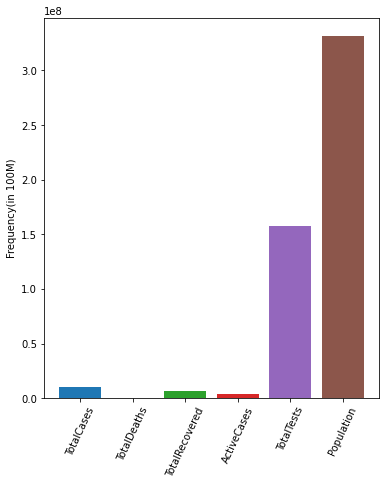

In [42]:
viz_colum = ['TotalCases','TotalDeaths', 'TotalRecovered', 'ActiveCases','TotalTests','Population']
viz_dict = {i:new_t['Values'][i] for i in viz_colum}
viz_plot = {j:''.join([i.replace(',','') for i in viz_dict[j]]).strip() for j in viz_dict}
viz_plot = {j:int(viz_plot[j]) for j in viz_plot}
yticker = [0,50,100,150,200,250,300]
    

plt.figure(figsize=(6,7))
for i in viz_plot:
    plt.bar(i,viz_plot[i])

# plt.ylim(0,max(viz_plot.values()))
plt.xticks(rotation = '65')   
# plt.yticks(np.arange(7),str(yticker))
plt.ylabel('Frequency (in 100M)')
plt.show()

In [25]:
{j:int(viz_plot[j]) for j in viz_plot}

{'TotalCases': 10278766,
 'TotalDeaths': 243731,
 'TotalRecovered': 6480552,
 'ActiveCases': 3554483,
 'TotalTests': 157450167,
 'Population': 331690410}

In [26]:
viz_dict = {i:new_t['Values'][i] for i in viz_colum}
viz_dict

{'TotalCases': '10,278,766',
 'TotalDeaths': '243,731 ',
 'TotalRecovered': '6,480,552',
 'ActiveCases': '3,554,483',
 'TotalTests': '157,450,167',
 'Population': '331,690,410 '}

In [28]:
viz_dict

{'TotalCases': '10,278,766',
 'TotalDeaths': '243,731 ',
 'TotalRecovered': '6,480,552',
 'ActiveCases': '3,554,483',
 'TotalTests': '157,450,167',
 'Population': '331,690,410 '}

In [31]:
viz_dict.values()

dict_values(['10,278,766', '243,731 ', '6,480,552', '3,554,483', '157,450,167', '331,690,410 '])

In [32]:
TotalCases:new_t['Values']['TotalCases']

In [33]:
{i:new_t['Values'][i] for i in viz_colum}

{'TotalCases': '10,278,766',
 'TotalDeaths': '243,731 ',
 'TotalRecovered': '6,480,552',
 'ActiveCases': '3,554,483',
 'TotalTests': '157,450,167',
 'Population': '331,690,410 '}

In [35]:
for i in viz_dict:
    viz_dict[i].replace(',','')

In [36]:
{j:''.join([i.replace(',','') for i in viz_dict[j]]).strip() for j in viz_dict}

{'TotalCases': '10278766',
 'TotalDeaths': '243731',
 'TotalRecovered': '6480552',
 'ActiveCases': '3554483',
 'TotalTests': '157450167',
 'Population': '331690410'}